# Graphs for the word counts

This notebook is used to create the graphs for the biased word counts.

In [1]:
import pandas as pd

In [2]:
# read xlsx file tab 'nouns'
nouns = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='nouns')

# read xlsx file tab 'verbs'
verbs = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='verbs')

# 'auxiliary verbs'
auxiliary_verbs = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='auxilliary verbs')

# 'adjectives'
adjectives = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='adjectives')

# 'pronouns'
pronouns = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='pronouns')

# 'adverbs'
adverbs = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='adverbs')

# 'interjections'
interjections = pd.read_excel('../data/bias_words/All term counts combined file.xlsx', sheet_name='interjections')

In [3]:
# head nouns
nouns.head()

,Noun,count,Important,biased,Main_Column
0,election,11611,1.0,NaN,1
1,ballot,6314,1.0,NaN,1
2,voting,6139,1.0,NaN,1
3,day,5121,NaN,NaN,0
4,state,5049,NaN,NaN,0


In [4]:
# for each df, make 'Main_Column' an integer
nouns['Main_Column'] = nouns['Main_Column'].astype(int)
verbs['Main_Column'] = verbs['Main_Column'].astype(int)
auxiliary_verbs['Main_Column'] = auxiliary_verbs['Main_Column'].astype(int)
adjectives['Main_Column'] = adjectives['Main_Column'].astype(int)
pronouns['Main_Column'] = pronouns['Main_Column'].astype(int)
adverbs['Main_Column'] = adverbs['Main_Column'].astype(int)
interjections['Main_Column'] = interjections['Main_Column'].astype(int)

In [5]:
# for each df, keep the rows that have a value greater than 0 in  column 'Main_Column'
nouns = nouns[nouns['Main_Column'] > 0]
verbs = verbs[verbs['Main_Column'] > 0]
auxiliary_verbs = auxiliary_verbs[auxiliary_verbs['Main_Column'] > 0]
adjectives = adjectives[adjectives['Main_Column'] > 0]
pronouns = pronouns[pronouns['Main_Column'] > 0]
adverbs = adverbs[adverbs['Main_Column'] > 0]
interjections = interjections[interjections['Main_Column'] > 0]

In [6]:
# head nouns
nouns.head()

,Noun,count,Important,biased,Main_Column
0,election,11611,1.0,NaN,1
1,ballot,6314,1.0,NaN,1
2,voting,6139,1.0,NaN,1
10,registration,2837,1.0,NaN,1
13,november,2409,1.0,NaN,1


In [7]:
df = pd.read_csv('../data/clean/Clustering_with_info.csv')
df.head()

,PostId,text,Platform,ChannelID,embeddings,State,tenure_2024,party_2024,prez_winner_2024,prez_winner_2020,battleground_2020,battleground_2024
0,80072838,"On November 29, the State Canvassing Board cer...",Facebook,8894188,"[-0.4845951199531555, 0.4088035225868225, 0.41...",Minnesota,9,D,D,D,1,0
1,80076411,The State Canvassing Board certified the 2022 ...,Twitter,8891709,"[-0.5558313727378845, 0.41650187969207764, 0.4...",Minnesota,9,D,D,D,1,0
2,80107630,: To all Baltimore County Election Judges who ...,Twitter,8891704,"[0.26043787598609924, -0.23166483640670776, 0....",Maryland,1,NaN,D,D,0,0
3,80070562,"See you bright and early, Owensboro.",Twitter,8891702,"[-0.2955371141433716, -0.05654048174619675, -0...",Kentucky,4,R,R,R,0,0
4,80066551,"See you bright and early, Owensboro.",Facebook,8894179,"[-0.2955371141433716, -0.05654048174619675, -0...",Kentucky,4,R,R,R,0,0


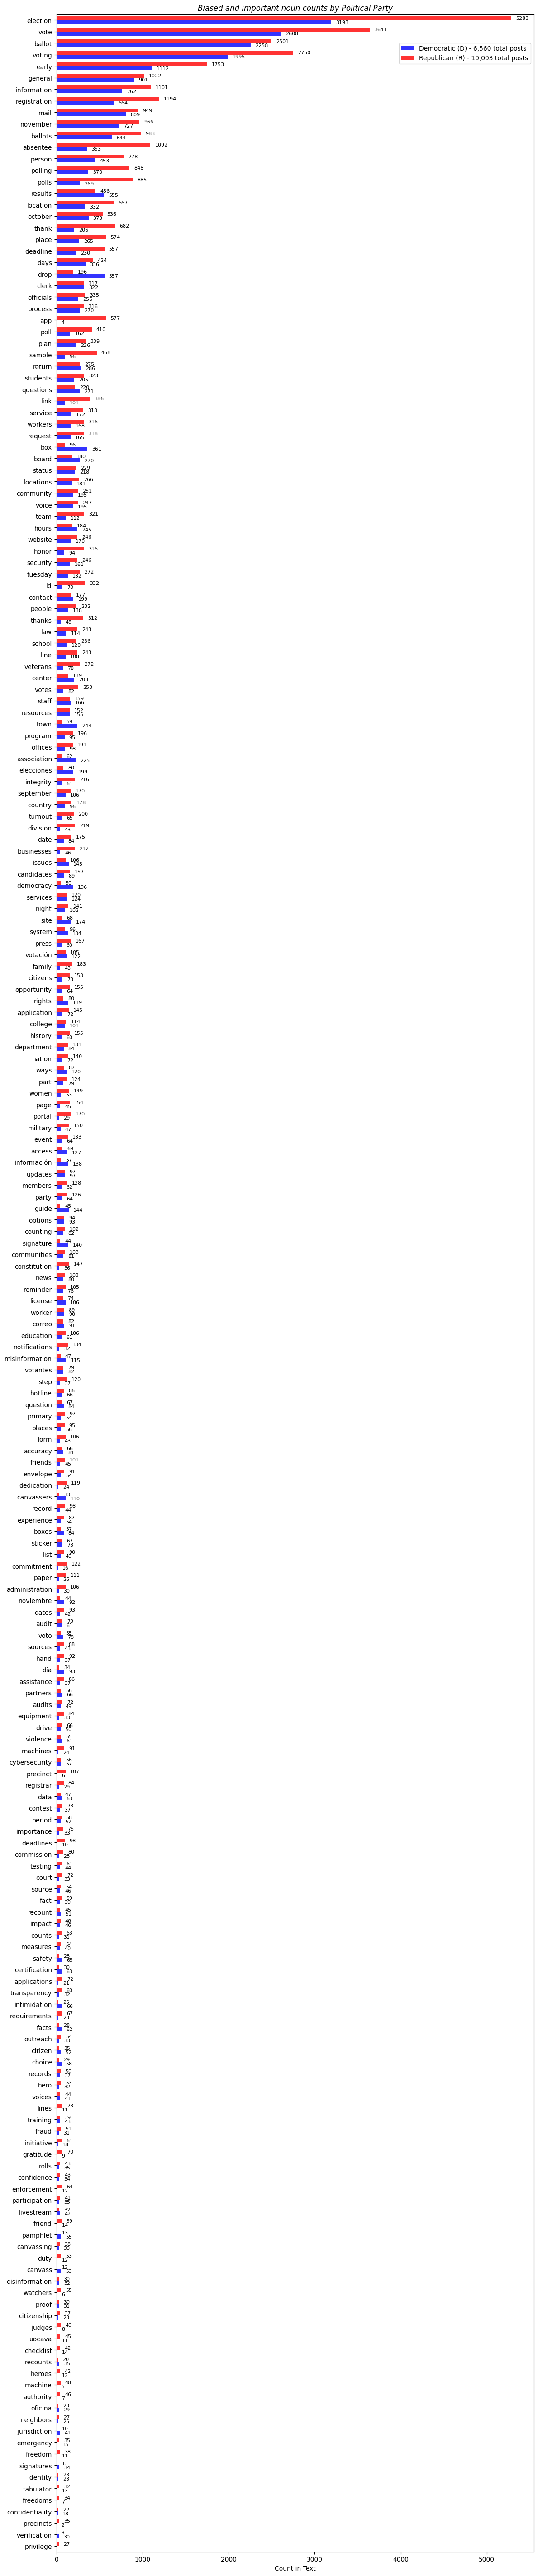

Total nouns analyzed: 220
Nouns with at least one occurrence: 220
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = nouns['Noun'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important noun counts by Political Party', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

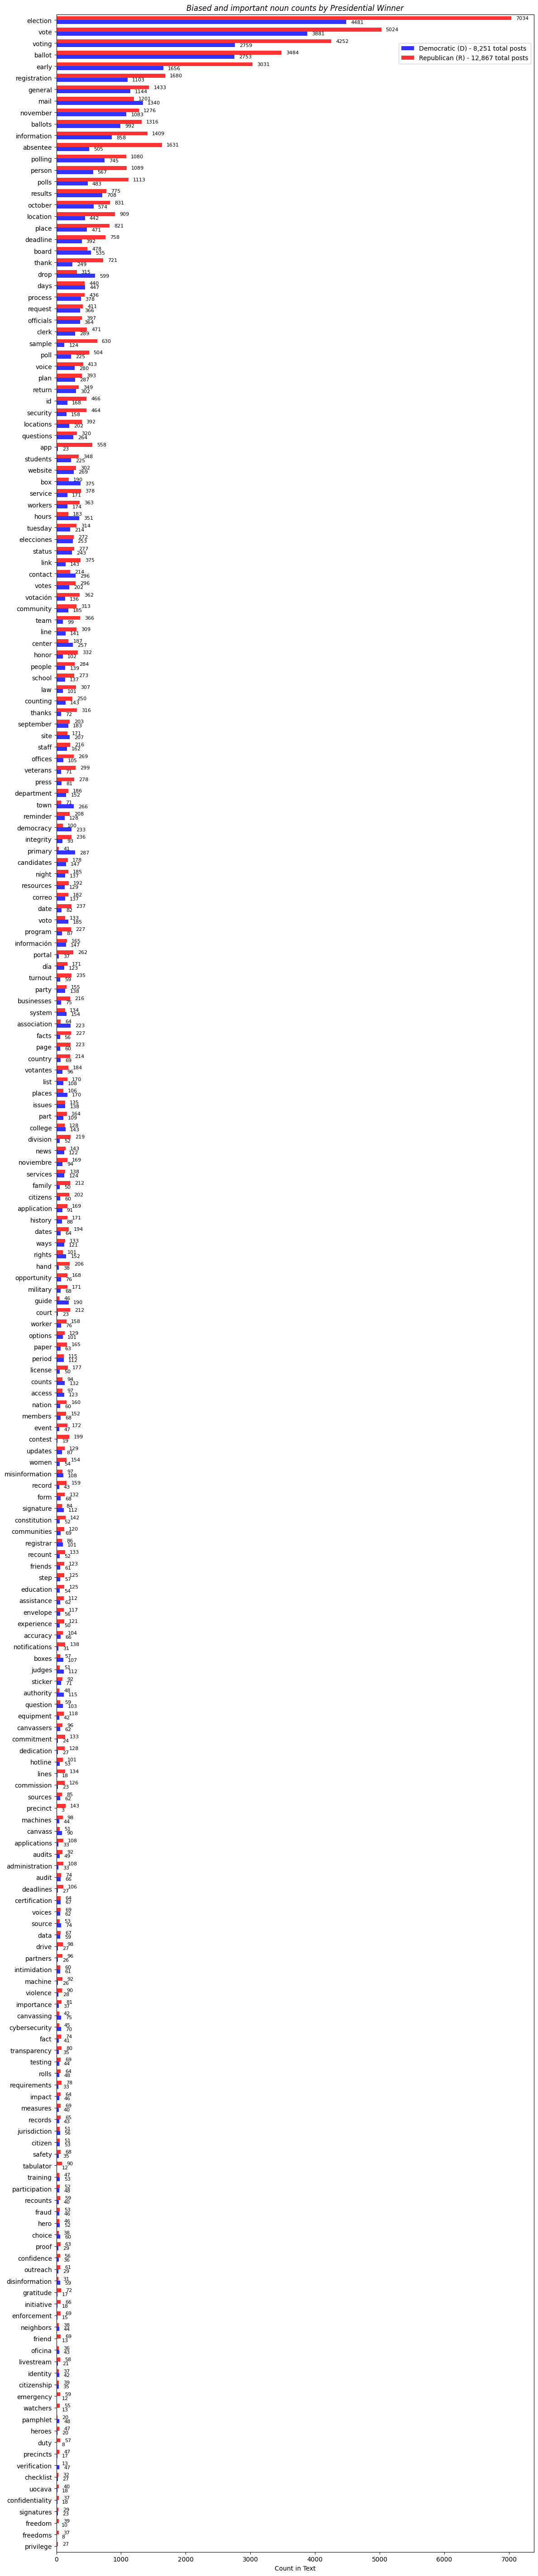

Total nouns analyzed: 220
Nouns with at least one occurrence: 220
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [22]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = nouns['Noun'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important noun counts by Presidential Winner', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

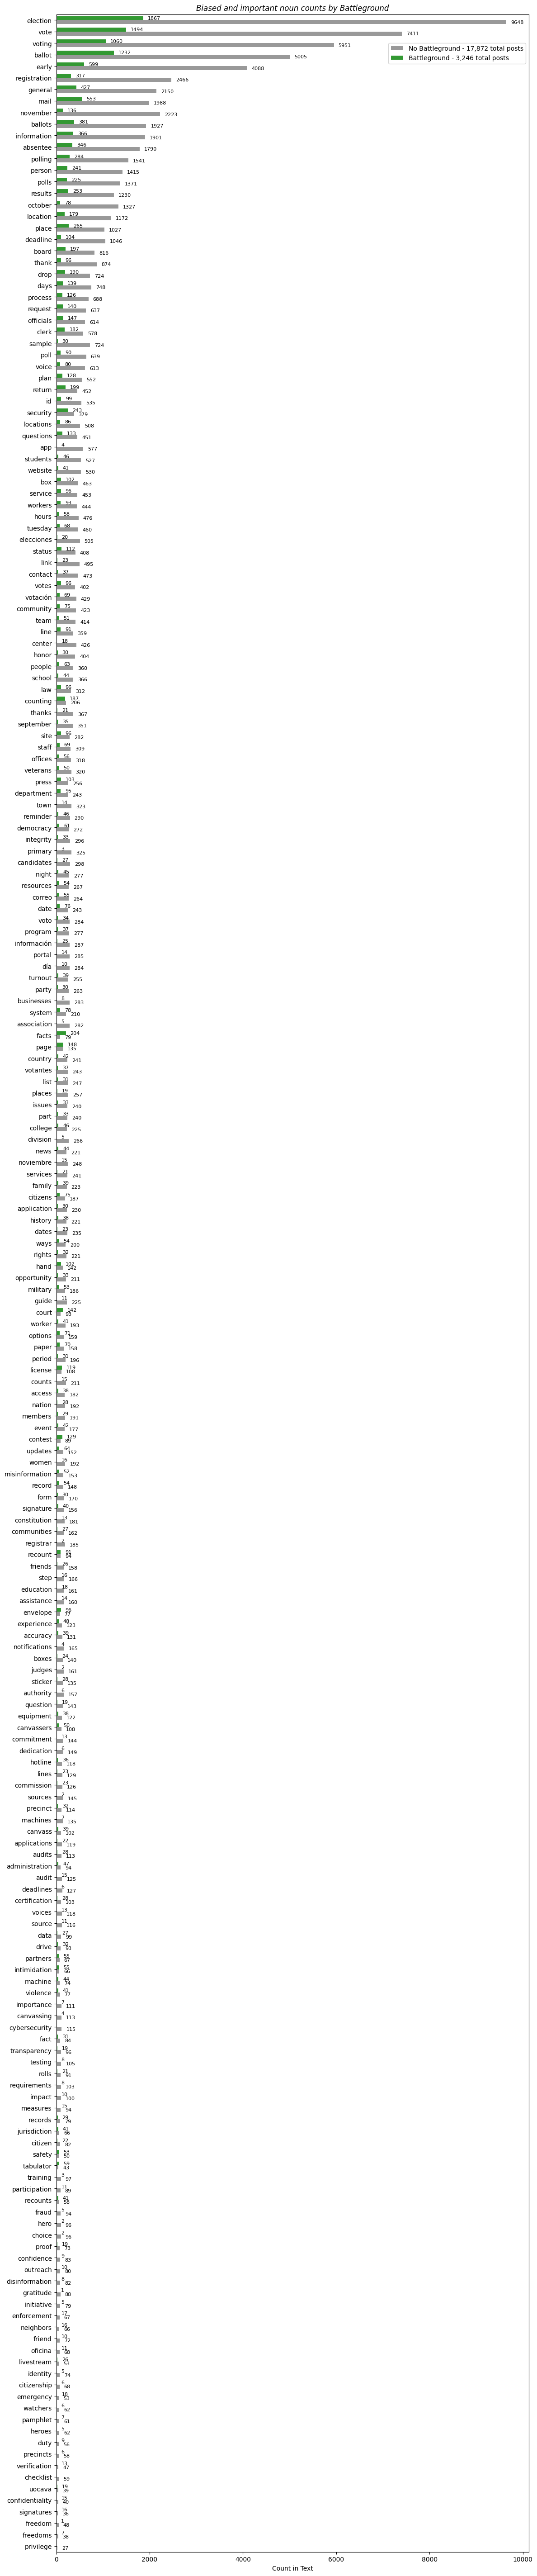

Total nouns analyzed: 220
Nouns with at least one occurrence: 220
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = nouns['Noun'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important noun counts by Battleground', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

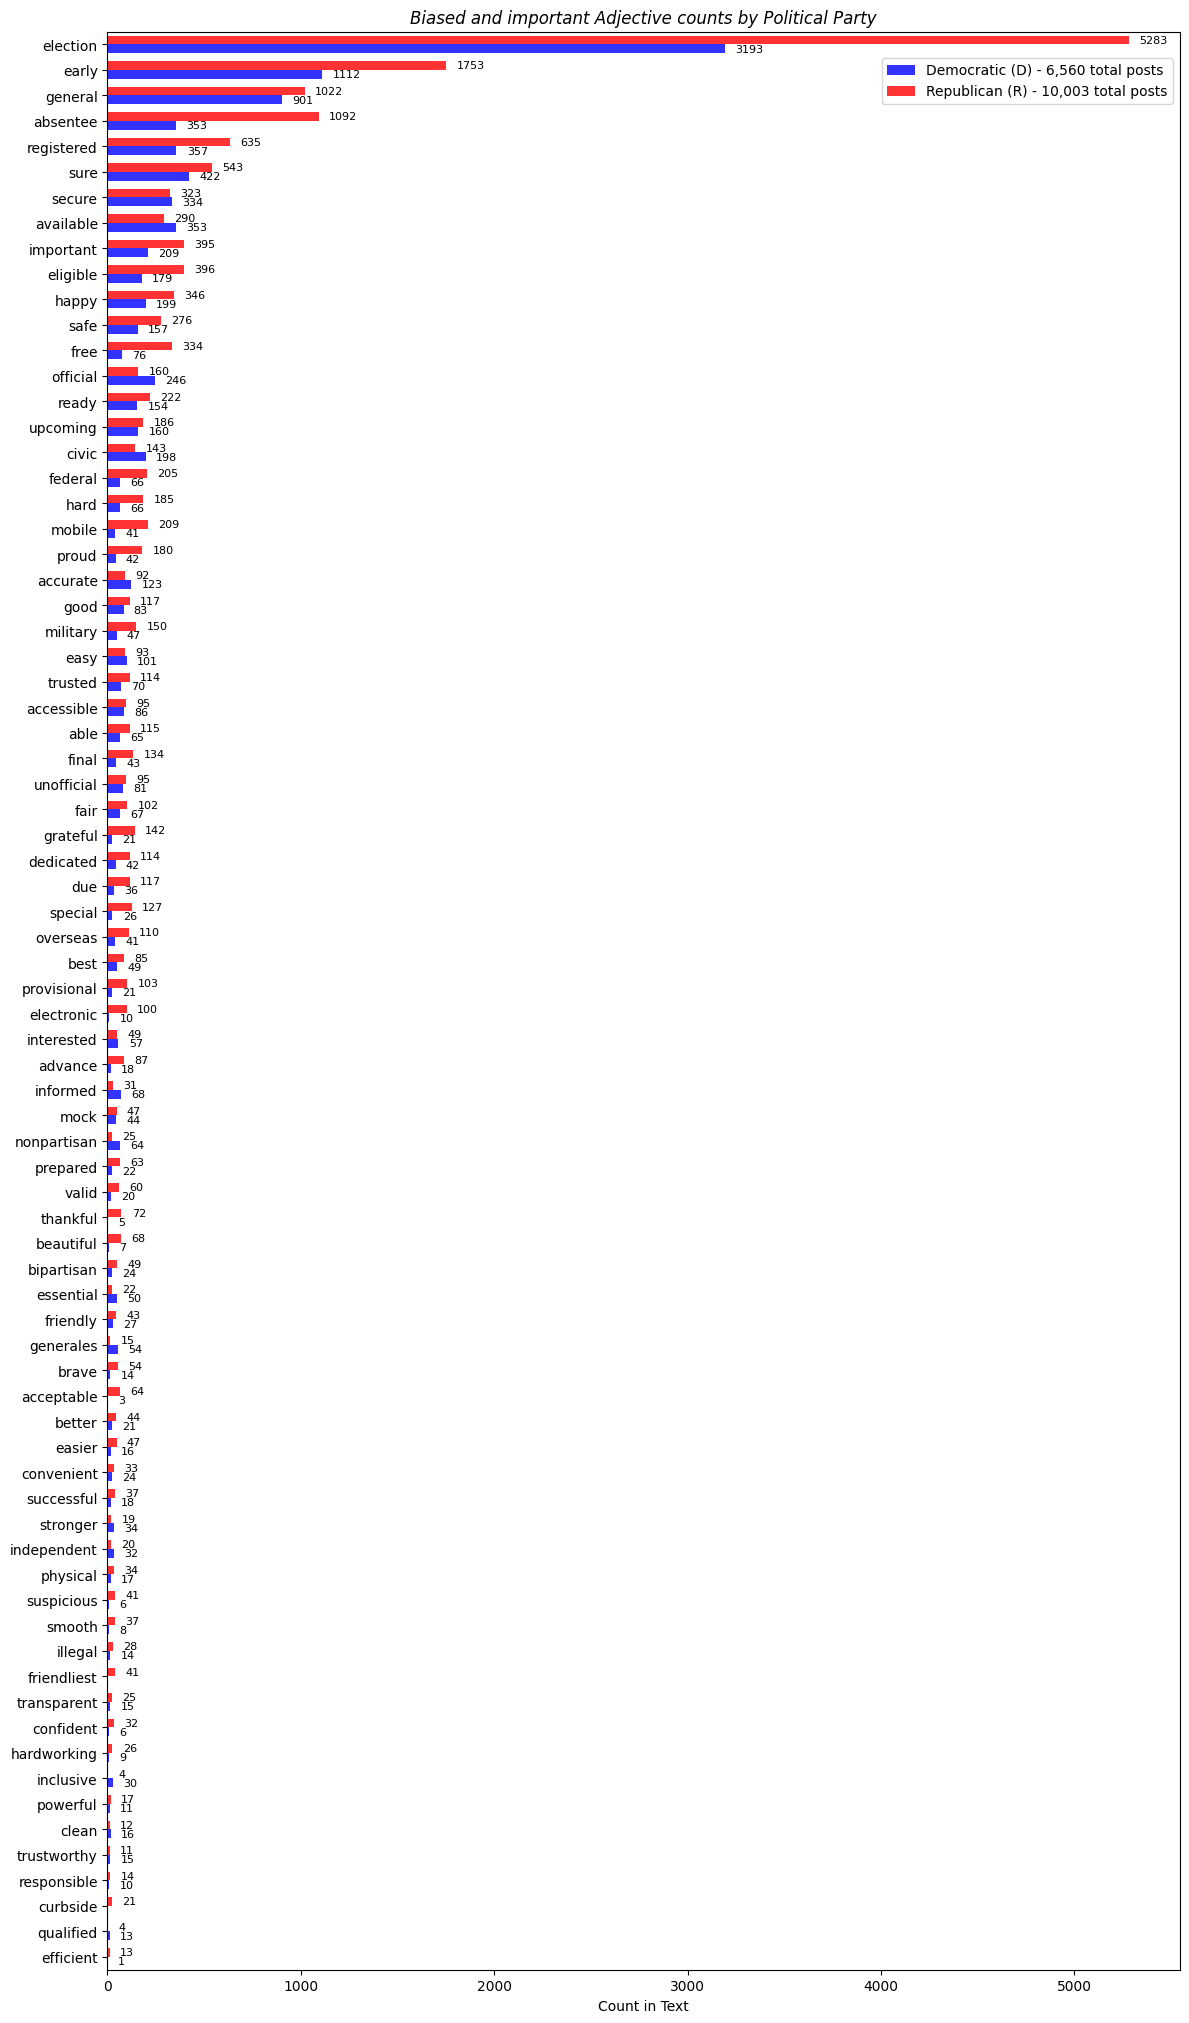

Total nouns analyzed: 76
Nouns with at least one occurrence: 76
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [25]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = adjectives['Adjective'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adjective counts by Political Party', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

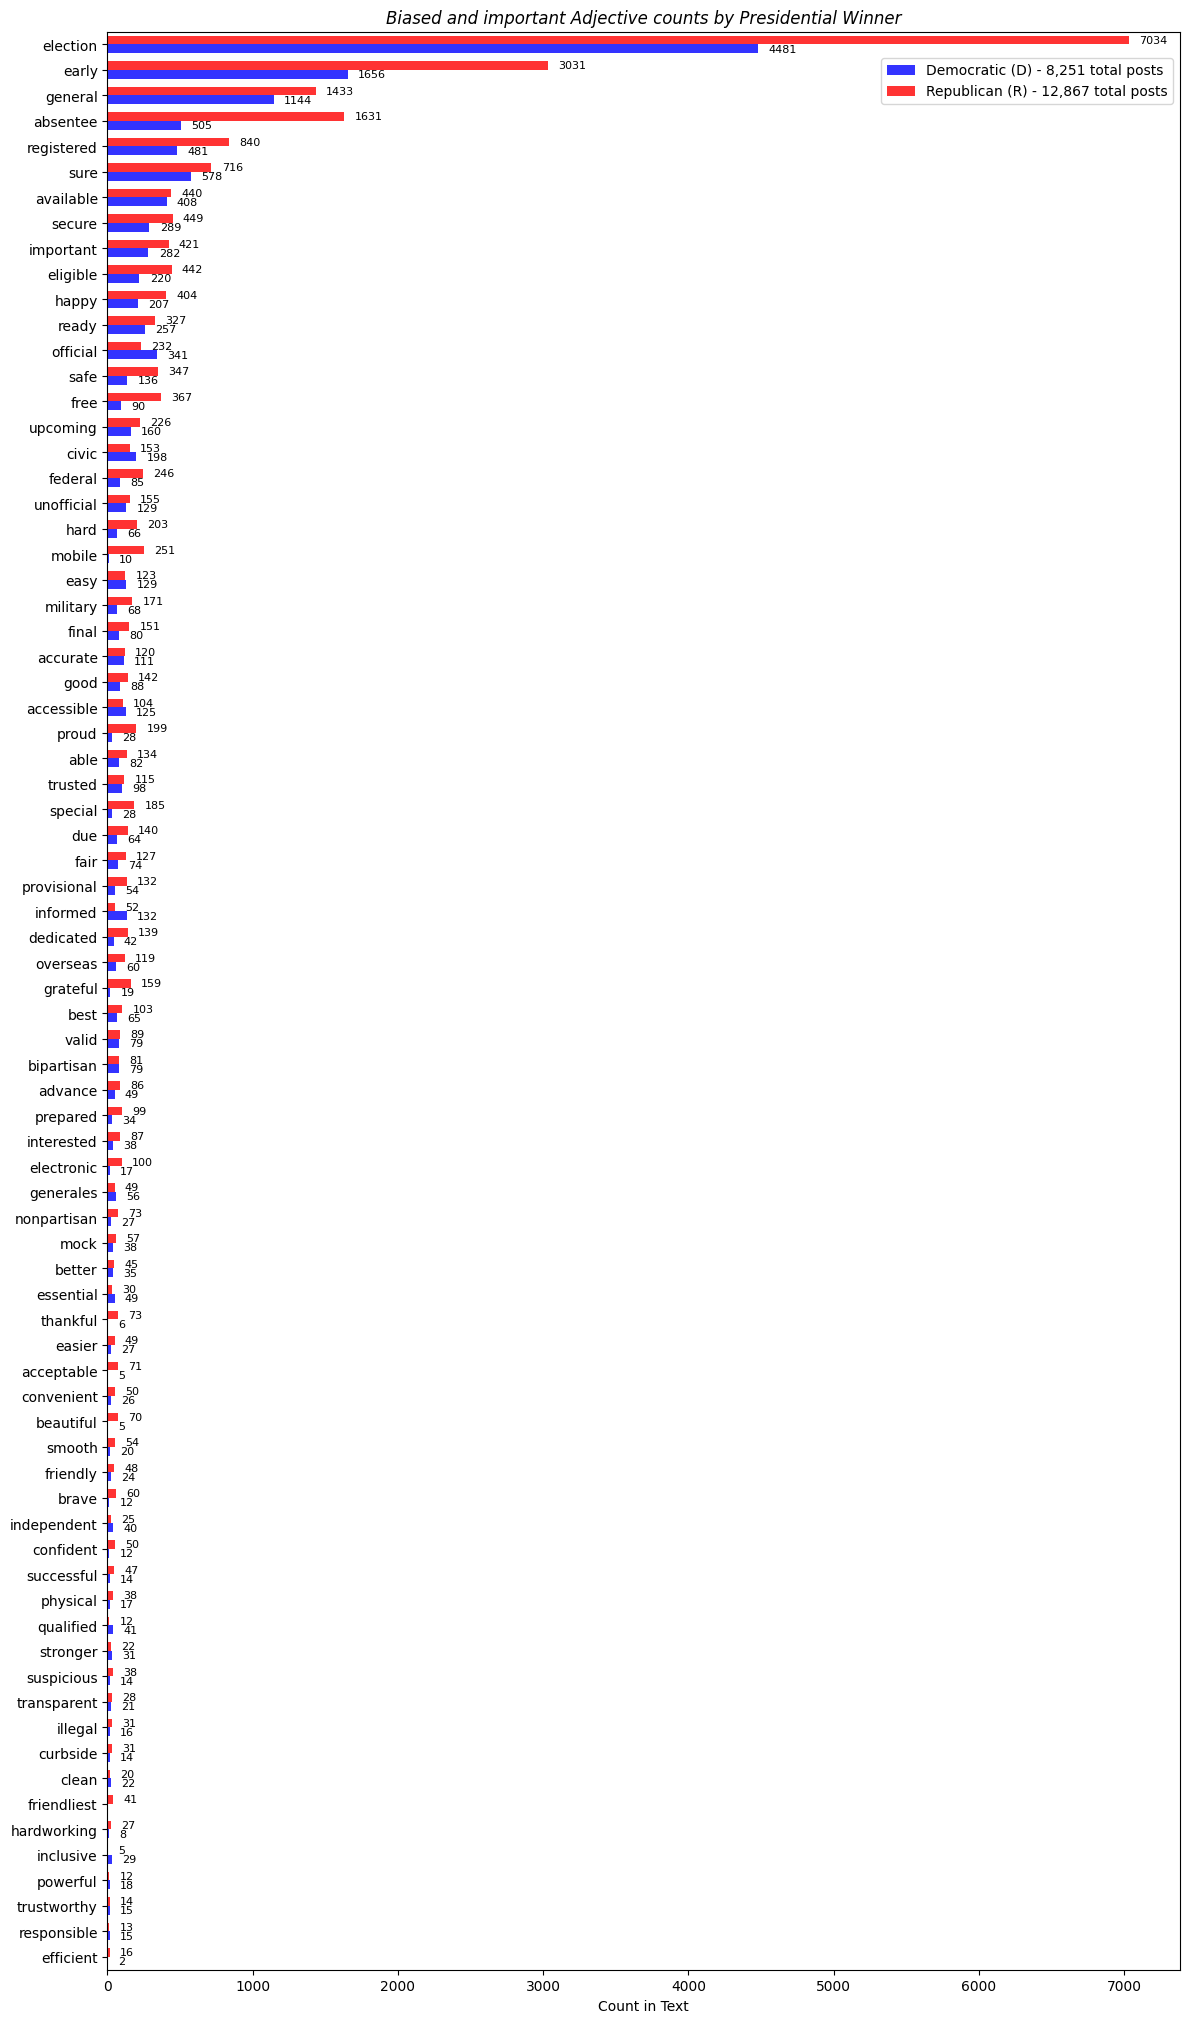

Total nouns analyzed: 76
Nouns with at least one occurrence: 76
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [26]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = adjectives['Adjective'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adjective counts by Presidential Winner', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

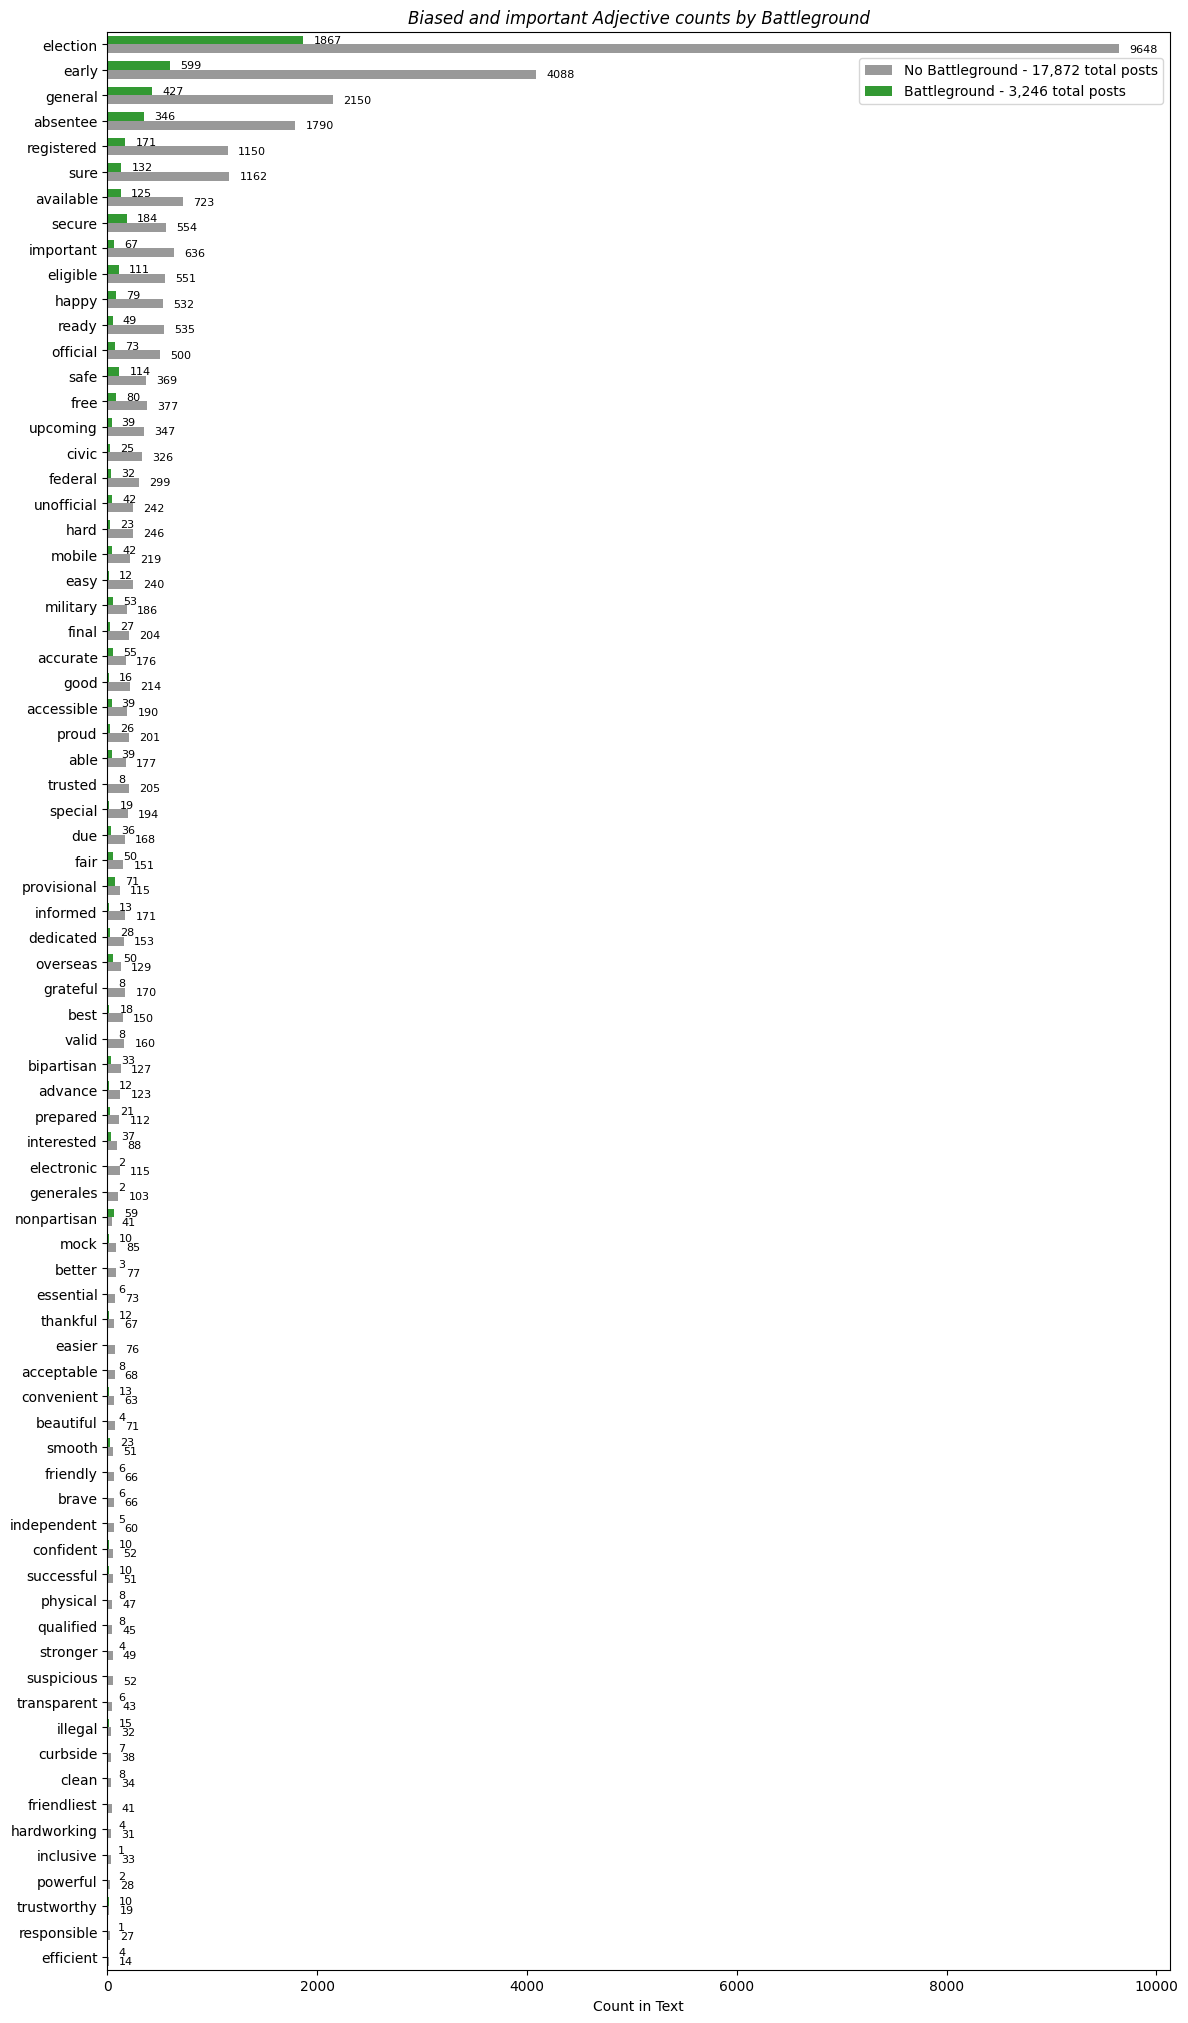

Total nouns analyzed: 76
Nouns with at least one occurrence: 76
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [27]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = adjectives['Adjective'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adjective counts by Battleground', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

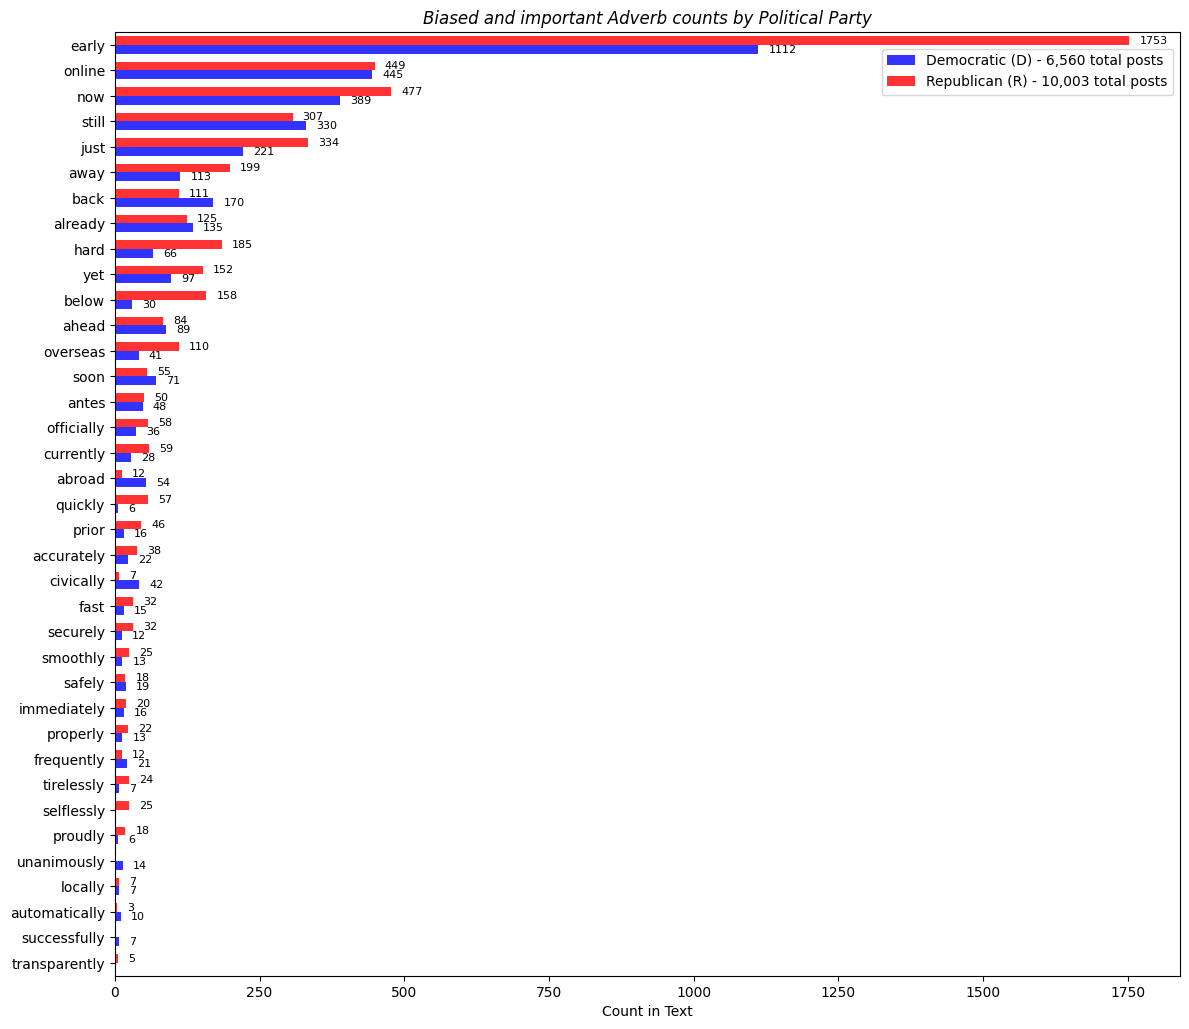

Total nouns analyzed: 37
Nouns with at least one occurrence: 37
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [29]:
import matplotlib.pyplot as plt
import numpy as np
import re
from collections import defaultdict

# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = adverbs['adverb'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adverb counts by Political Party', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

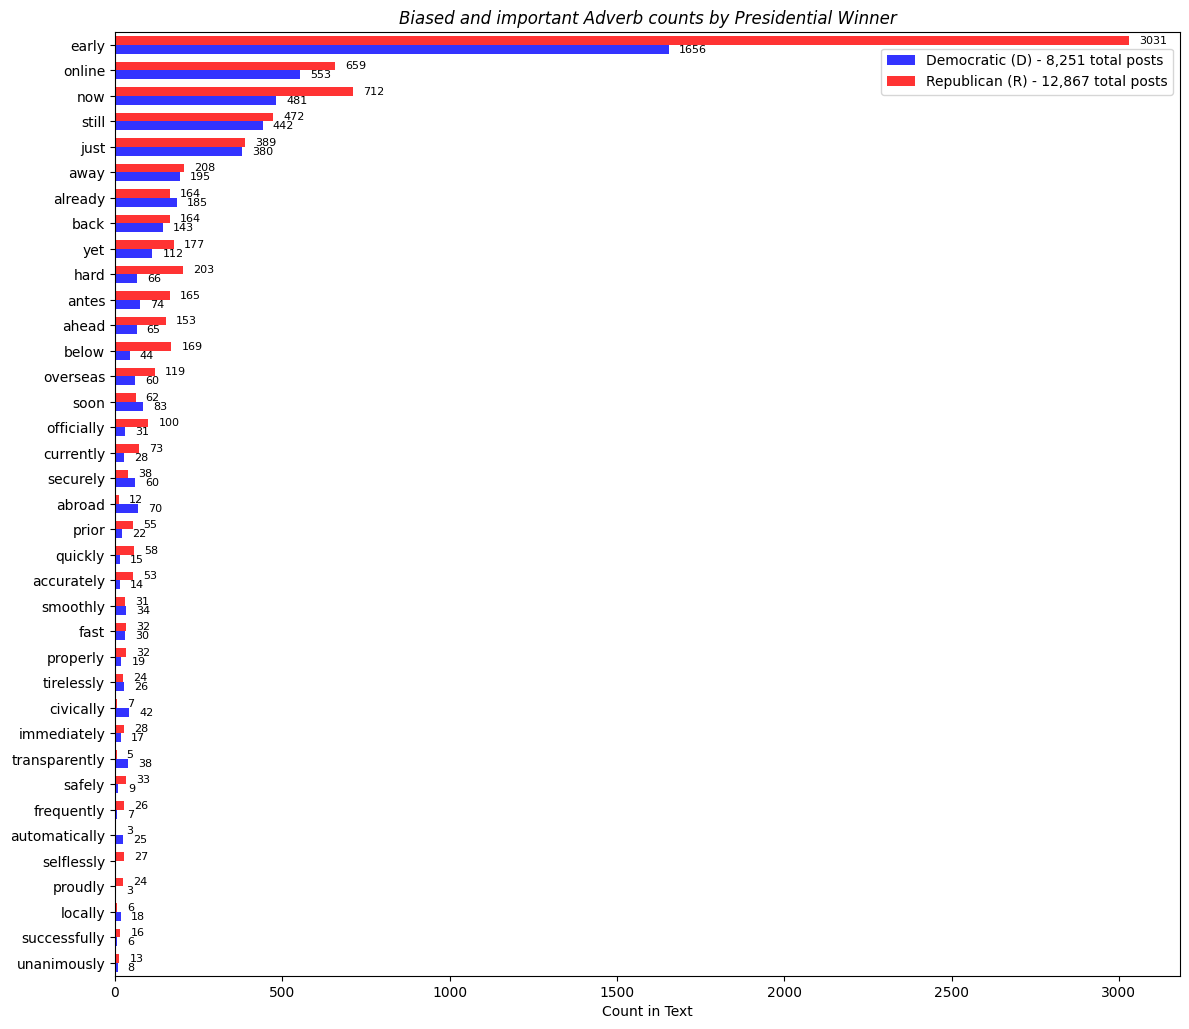

Total nouns analyzed: 37
Nouns with at least one occurrence: 37
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [30]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = adverbs['adverb'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adverb counts by Presidential Winner', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

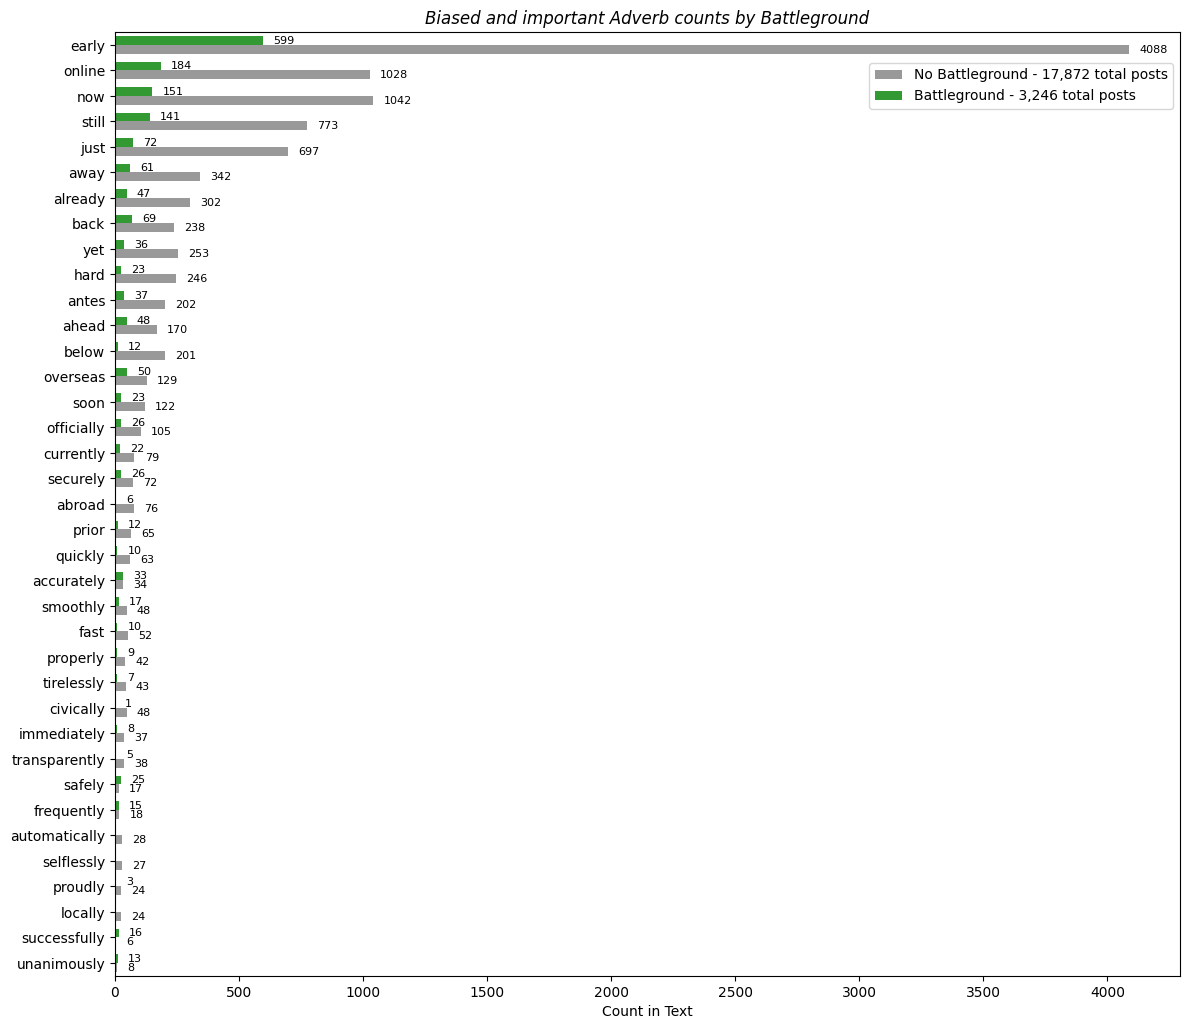

Total nouns analyzed: 37
Nouns with at least one occurrence: 37
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [32]:

# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = adverbs['adverb'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Adverb counts by Battleground', fontsize=12, style='italic')

# ax.legend()
ax.legend(bbox_to_anchor=(1.0, 0.975), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

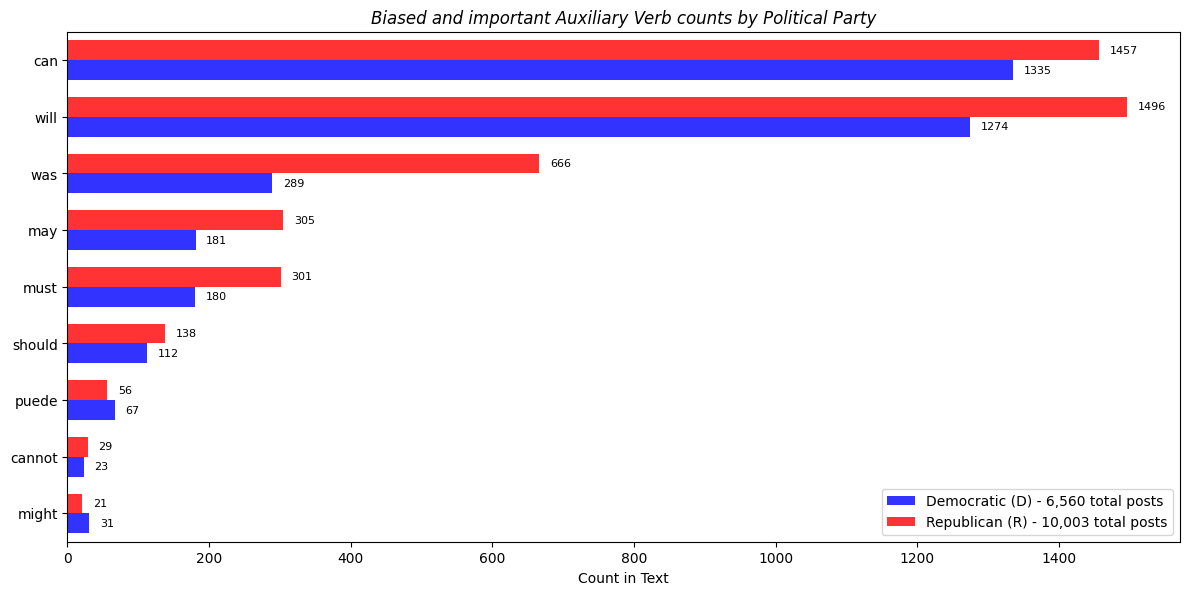

Total nouns analyzed: 9
Nouns with at least one occurrence: 9
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [36]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = auxiliary_verbs['auxilliary verbs'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Auxiliary Verb counts by Political Party', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

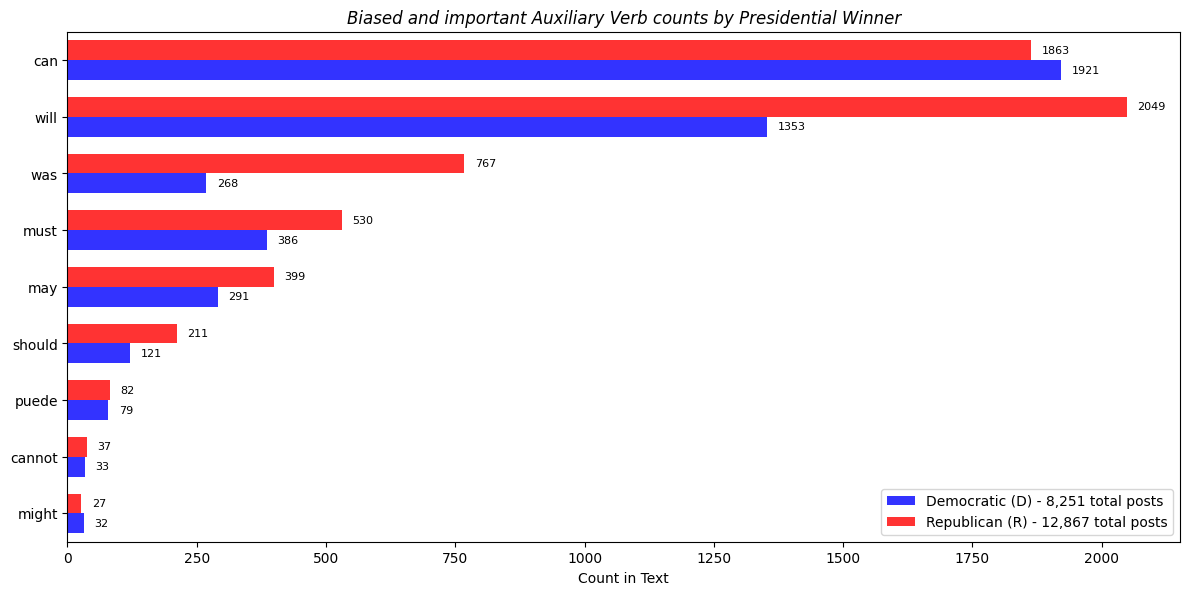

Total nouns analyzed: 9
Nouns with at least one occurrence: 9
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [37]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = auxiliary_verbs['auxilliary verbs'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Auxiliary Verb counts by Presidential Winner', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

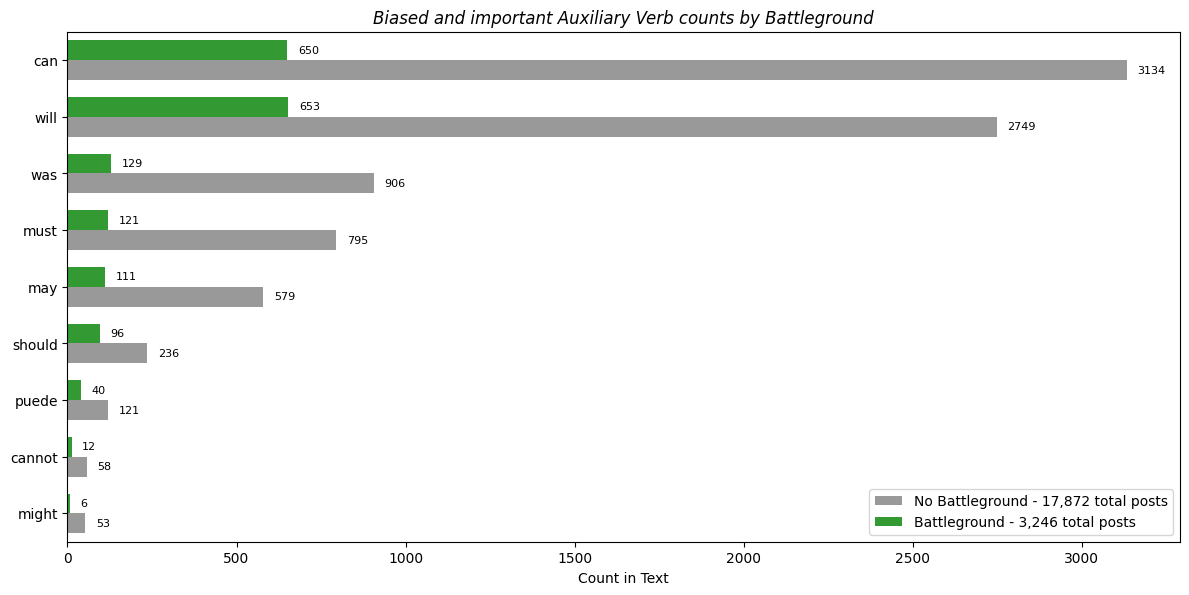

Total nouns analyzed: 9
Nouns with at least one occurrence: 9
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [39]:
# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = auxiliary_verbs['auxilliary verbs'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Auxiliary Verb counts by Battleground', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.975), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

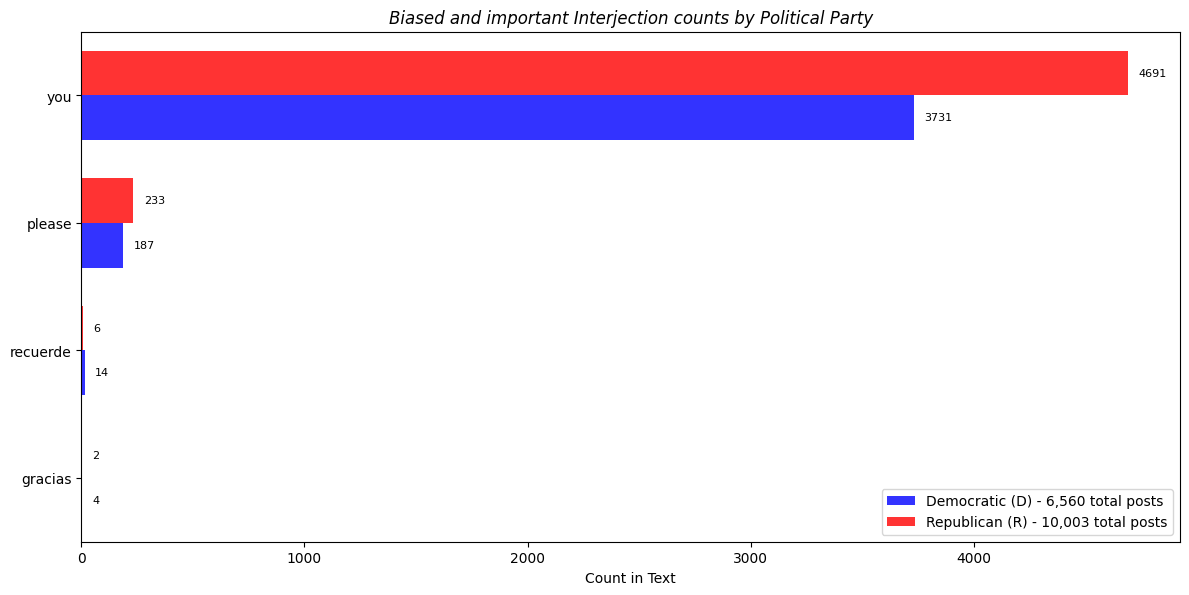

Total nouns analyzed: 4
Nouns with at least one occurrence: 4
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [41]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = interjections['interjections'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Interjection counts by Political Party', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

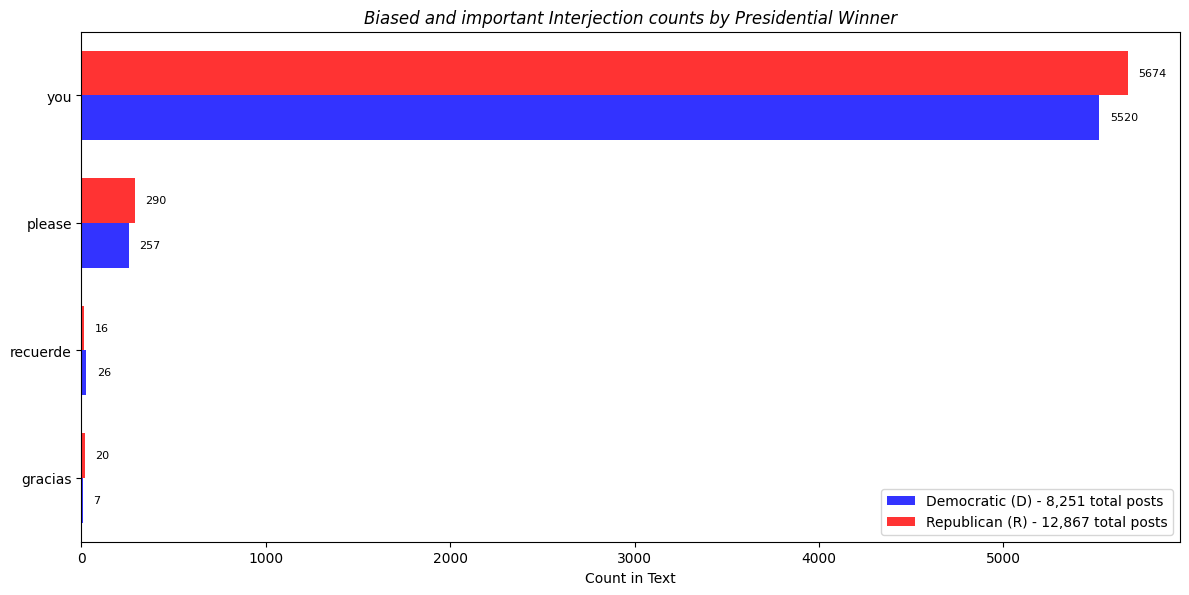

Total nouns analyzed: 4
Nouns with at least one occurrence: 4
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [43]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = interjections['interjections'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Interjection counts by Presidential Winner', fontsize=12, style='italic')

ax.legend()


# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

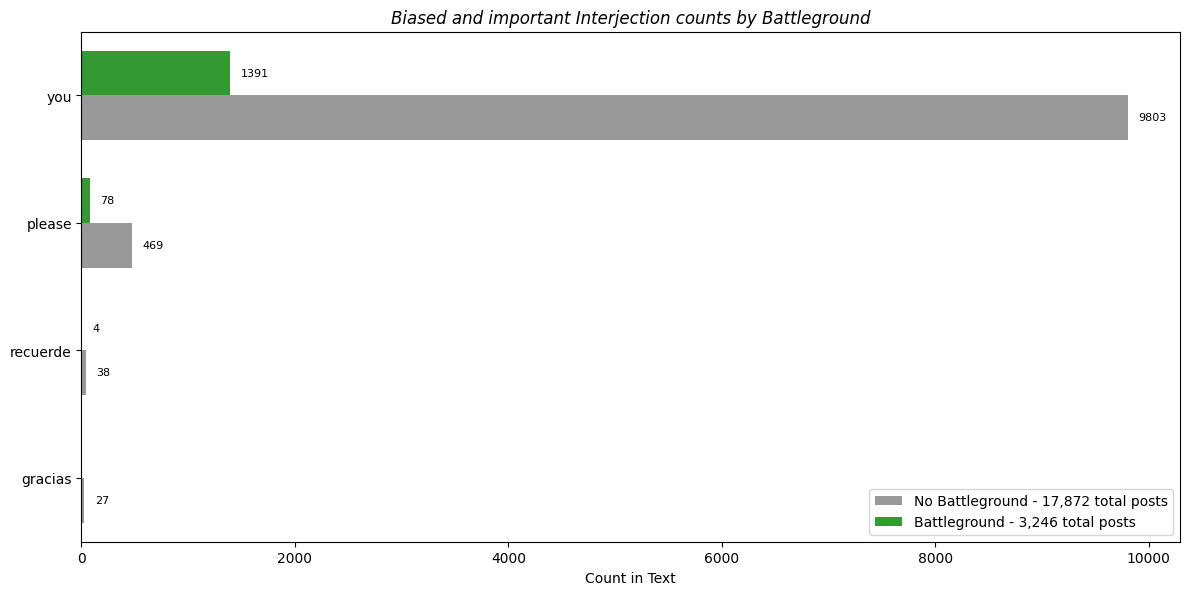

Total nouns analyzed: 4
Nouns with at least one occurrence: 4
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [45]:
# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = interjections['interjections'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Interjection counts by Battleground', fontsize=12, style='italic')

ax.legend(loc='lower right')
# ax.legend(bbox_to_anchor=(1.0, 0.975), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

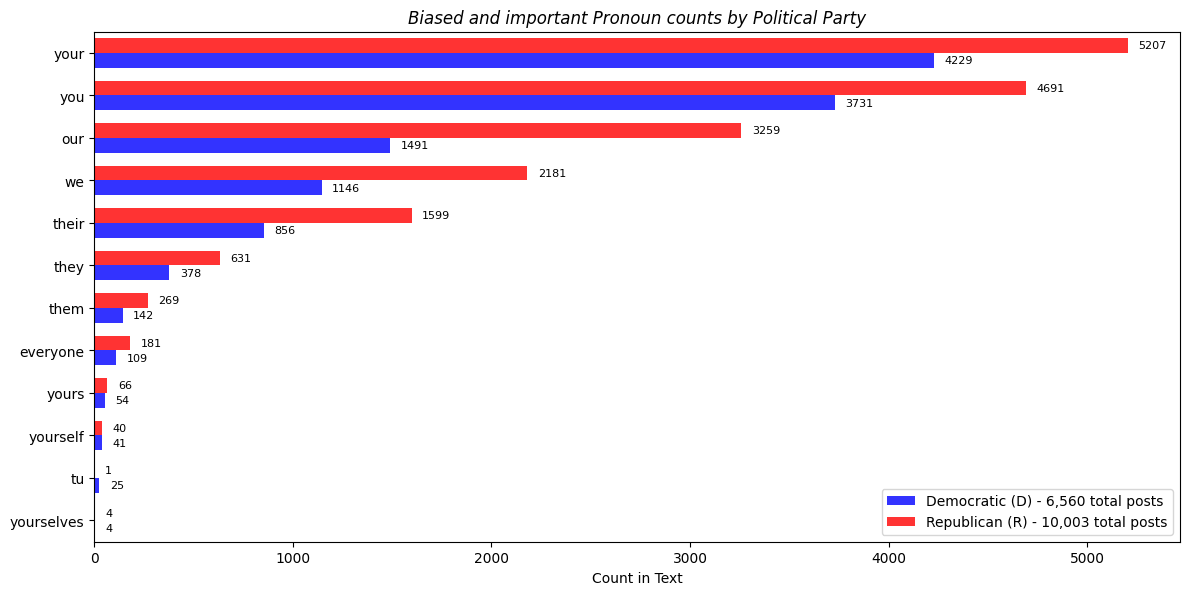

Total nouns analyzed: 12
Nouns with at least one occurrence: 12
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [47]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = pronouns['pronouns'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Pronoun counts by Political Party', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

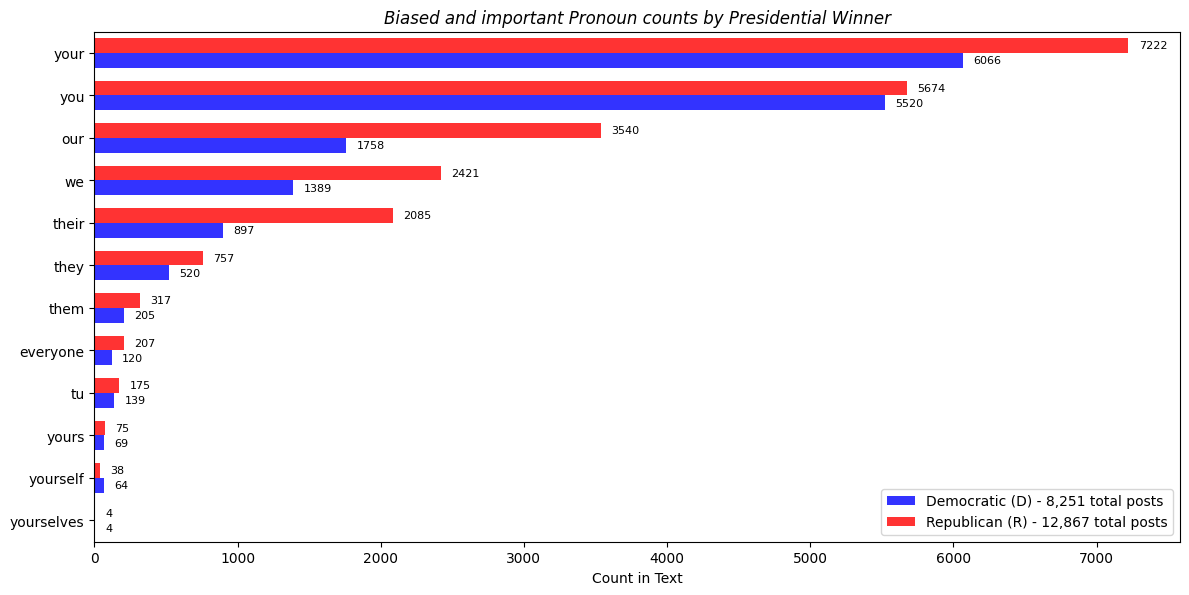

Total nouns analyzed: 12
Nouns with at least one occurrence: 12
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [48]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = pronouns['pronouns'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Pronoun counts by Presidential Winner', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

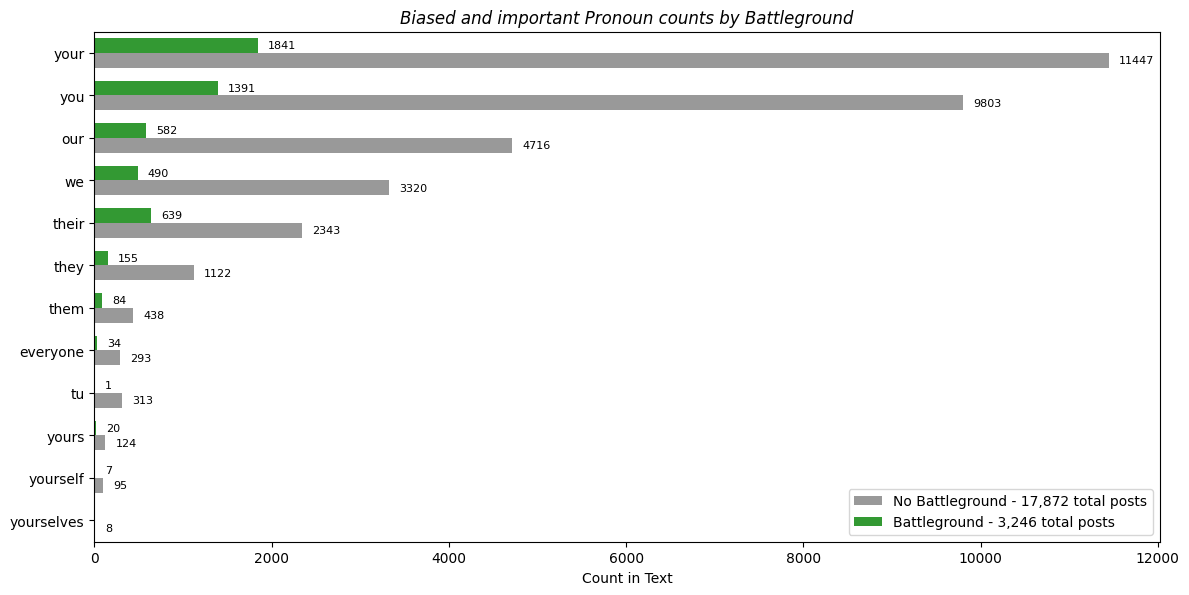

Total nouns analyzed: 12
Nouns with at least one occurrence: 12
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [49]:
# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = pronouns['pronouns'].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Pronoun counts by Battleground', fontsize=12, style='italic')

ax.legend(loc='lower right')
# ax.legend(bbox_to_anchor=(1.0, 0.975), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

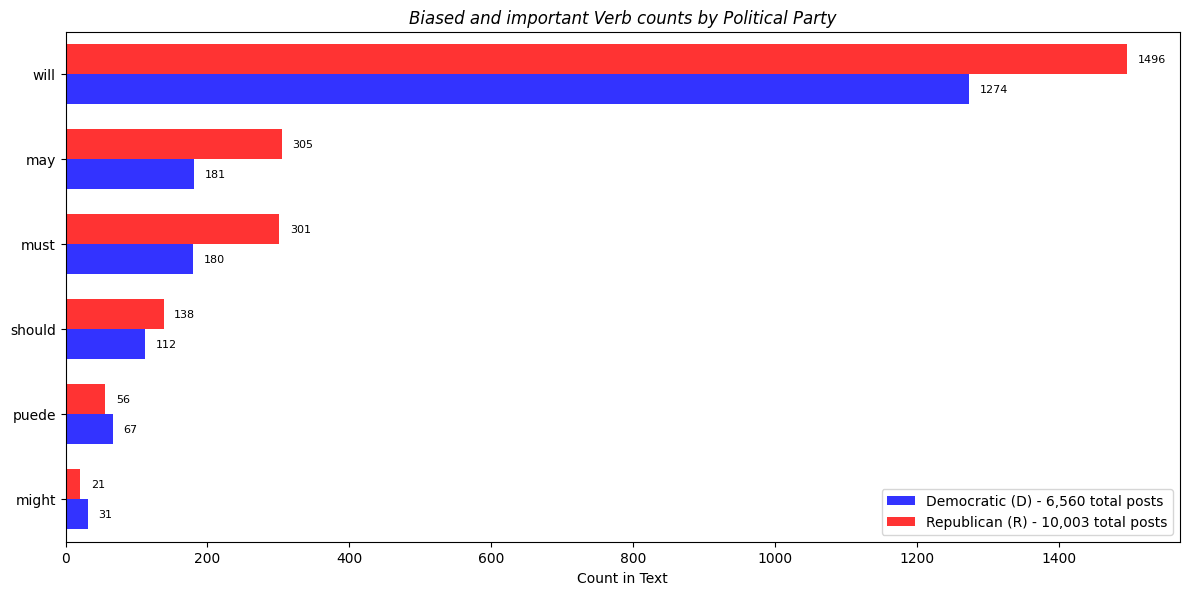

Total nouns analyzed: 6
Nouns with at least one occurrence: 6
Total Democratic posts: 6,560
Total Republican posts: 10,003


In [52]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['party_2024'])

# Get the list of nouns to search for
noun_list = verbs['Verb '].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['party_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['party_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['party_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Verb counts by Political Party', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

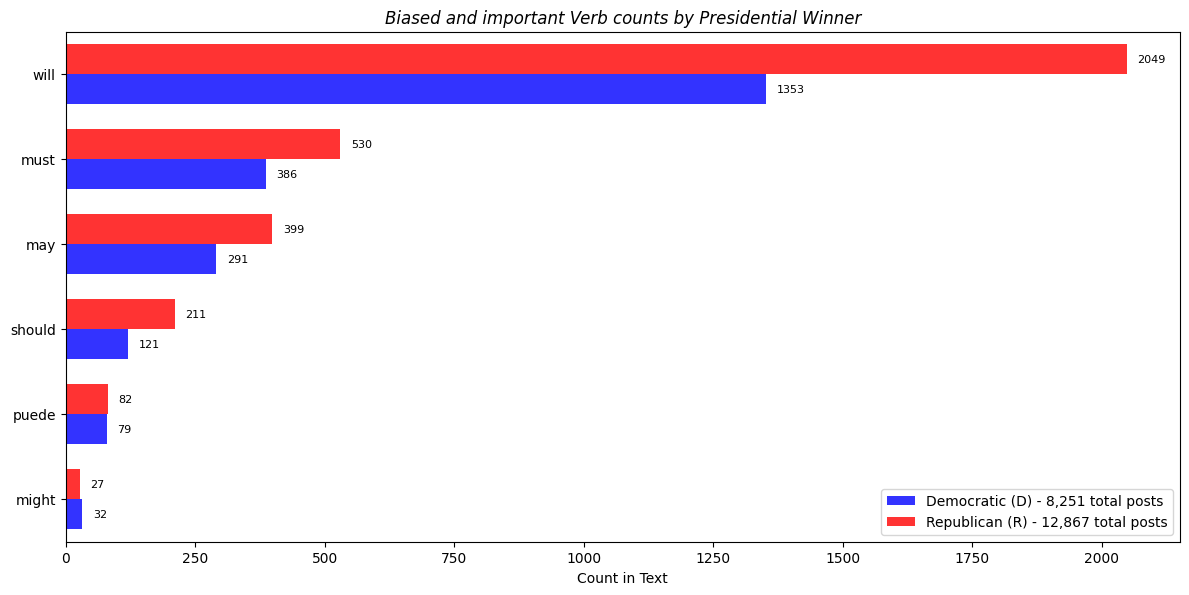

Total nouns analyzed: 6
Nouns with at least one occurrence: 6
Total Democratic posts: 8,251
Total Republican posts: 12,867


In [53]:
# Filter out rows where party_2024 is NaN
df_filtered = df.dropna(subset=['prez_winner_2024'])

# Get the list of nouns to search for
noun_list = verbs['Verb '].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {'D': 0, 'R': 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in ['D', 'R']:
        party_texts = df_filtered[df_filtered['prez_winner_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun]['D']
    r_count = noun_counts[noun]['R']
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'D'])
total_r_posts = len(df_filtered[df_filtered['prez_winner_2024'] == 'R'])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'Democratic (D) - {total_d_posts:,} total posts', color='blue', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Republican (R) - {total_r_posts:,} total posts', color='red', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Verb counts by Presidential Winner', fontsize=12, style='italic')

ax.legend()
# ax.legend(bbox_to_anchor=(1.0, 0.99), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")

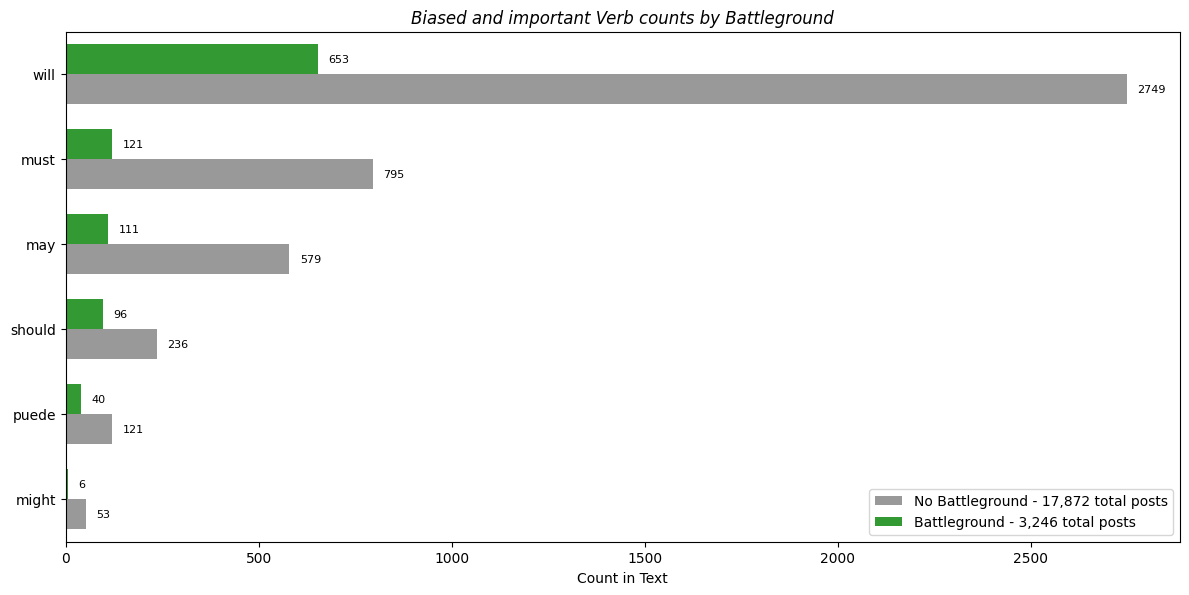

Total nouns analyzed: 6
Nouns with at least one occurrence: 6
Total Democratic posts: 17,872
Total Republican posts: 3,246


In [54]:
# Filter out rows where battleground_2024 is NaN
df_filtered = df.dropna(subset=['battleground_2024'])

# Get the list of nouns to search for
noun_list = verbs['Verb '].tolist()

# Count occurrences of each noun by party
noun_counts = defaultdict(lambda: {0.0: 0, 1.0: 0})

for noun in noun_list:
    # Create regex pattern for whole word matching (case insensitive)
    pattern = r'\b' + re.escape(noun.lower()) + r'\b'
    
    for party in [0.0, 1.0]:
        party_texts = df_filtered[df_filtered['battleground_2024'] == party]['text']
        count = 0
        for text in party_texts:
            if isinstance(text, str):
                count += len(re.findall(pattern, text.lower()))
        noun_counts[noun][party] = count

# Prepare data for plotting and sort by total occurrence
noun_data = []
for noun in noun_list:
    d_count = noun_counts[noun][0.0]
    r_count = noun_counts[noun][1.0]
    total_count = d_count + r_count
    if total_count > 0:  # Only include nouns that appear at least once
        noun_data.append((noun, d_count, r_count, total_count))

# Sort by total count in ascending order (least to most) so invert_yaxis shows most at top
noun_data.sort(key=lambda x: x[3], reverse=False)

# Extract sorted data
nouns_to_plot = [item[0] for item in noun_data]
d_counts = [item[1] for item in noun_data]
r_counts = [item[2] for item in noun_data]

# Calculate total posts by party
total_d_posts = len(df_filtered[df_filtered['battleground_2024'] == 0.0])
total_r_posts = len(df_filtered[df_filtered['battleground_2024'] == 1.0])

# Create horizontal bar chart with adjusted height
fig, ax = plt.subplots(figsize=(12, max(6, len(nouns_to_plot) * 0.3)))

y_pos = np.arange(len(nouns_to_plot))
bar_height = 0.35

# Create bars
bars1 = ax.barh(y_pos - bar_height/2, d_counts, bar_height, 
                label=f'No Battleground - {total_d_posts:,} total posts', color='gray', alpha=0.8)
bars2 = ax.barh(y_pos + bar_height/2, r_counts, bar_height,
                label=f'Battleground - {total_r_posts:,} total posts', color='green', alpha=0.8)

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(nouns_to_plot)
ax.invert_yaxis()  # This makes the highest values appear at the top
ax.set_xlabel('Count in Text')
ax.set_title('Biased and important Verb counts by Battleground', fontsize=12, style='italic')

ax.legend(loc='lower right')
# ax.legend(bbox_to_anchor=(1.0, 0.975), loc='upper right')

# Set tight y-axis limits
ax.set_ylim(-0.5, len(nouns_to_plot) - 0.5)

# Add value labels on bars
for i, (d_count, r_count) in enumerate(zip(d_counts, r_counts)):
    if d_count > 0:
        ax.text(d_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i - bar_height/2, str(d_count), va='center', fontsize=8)
    if r_count > 0:
        ax.text(r_count + max(max(d_counts), max(r_counts)) * 0.01, 
                i + bar_height/2, str(r_count), va='center', fontsize=8)

plt.tight_layout()
plt.subplots_adjust(top=0.95, bottom=0.1)  # Reduce top and bottom margins
plt.show()

# Print summary statistics
print(f"Total nouns analyzed: {len(noun_list)}")
print(f"Nouns with at least one occurrence: {len(nouns_to_plot)}")
print(f"Total Democratic posts: {total_d_posts:,}")
print(f"Total Republican posts: {total_r_posts:,}")